**PHYSICS PROBLEM: BOM BATU**

Team: GTaEE (Graph Theory and Electrodynamics Enthusiast)

Competition: IMPACT 4.0 2024

Final Stage Physics Problem

**Mengimport Library dan Membaca Data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

rawData = pd.read_csv("data.csv")
rawData.head(20)

,bomb_name,E(TJ),rho(kg/m^3),t(ms),r(m)
0,adel,84,1.204,0.000,0
1,adel,84,1.204,4.167,250
2,adel,84,1.204,8.333,250
3,adel,84,1.204,12.500,250
4,adel,84,1.204,16.667,250
5,adel,84,1.204,20.833,250
6,adel,84,1.204,25.000,250
7,adel,84,1.204,29.167,250
8,adel,84,1.204,33.333,250
9,adel,84,1.204,37.500,250


**Part a: Analisis Dimensi**

Jari-jari muka ledakan (r - [L]) bergantung pada tiga variabel:
- Energi: E - [M][L]^2[T]^(-2)
- Rapat Udara Atmosfer: rho - [M][L]^(-3)
- Waktu: t - [T]

Hubungan tersebut diekspresikan dengan persamaan:

r = c * E^x * rho^y * t^z

Dimensi dari persamaan tersebut adalah:
- [L] = ([M][L]^2[T]^(-2))^x * ([M][L]^(-3))^y * [T]^z
- [L] = [M]^(x+y) * [L]^(2x-3y) * [T]^(-2x+z)

Dengan menyamakan pangkat dari kedua ruas, didapat tiga persamaan:
- M:   x +  y     = 0 ...(1)
- L:  2x - 3y     = 1 ...(2)
- T: -2x      + z = 0 ...(3)

Olah Persamaan:
- Eliminasi x dari (1) dan (2):
  - 2(1)-(2): 5y = -1
  - y = -1/5
- Substitusi y ke (1):
  - x = -y
  - x = 1/5
- Substitusi x ke (3):
  - z = 2x
  - z = 2/5

Didapat **(x, y, z) = (1/5, -1/5, 2/5)** dan persamaan:

r = c * E^(1/5) * rho^(-1/5) * t^(2/5)

r = c * (E * t^2 / rho)^(1/5)

**Part b: Data Fiktif**

Cek Data Manakah yang Merupakan Data Fiktif

In [2]:
rawData['fictive'] = 0

for column in rawData.columns:
    if column == "bomb_name":
        rawData['fictive'] += rawData[column] == "19623"
    else:
        rawData['fictive'] += rawData[column] == 19623

Cek Keberadaan Data Fiktif Duplikat
(1 baris memiliki dua nilai fiktif)

In [3]:
rawData['doubleFictive'] = rawData['fictive'] > 1
print(rawData['doubleFictive'].sum())

0


Tidak ada data fiktif duplikat.

Hitung Banyak Data Fiktif

In [4]:
rawData['fictive'].sum()

np.int64(131)

Terdapat **131** data fiktif.

Filter Data Fiktif

In [5]:
filteredData = rawData[rawData['fictive'] == False].reset_index().drop(columns=['index','fictive','doubleFictive'])
filteredData.head(20)

,bomb_name,E(TJ),rho(kg/m^3),t(ms),r(m)
0,adel,84,1.204,0.000,0
1,adel,84,1.204,4.167,250
2,adel,84,1.204,8.333,250
3,adel,84,1.204,12.500,250
4,adel,84,1.204,16.667,250
5,adel,84,1.204,20.833,250
6,adel,84,1.204,25.000,250
7,adel,84,1.204,29.167,250
8,adel,84,1.204,33.333,250
9,adel,84,1.204,37.500,250


**Part c: Konstanta Persamaan**

Ubah Satuan Data Menjadi Satuan SI

In [6]:
filteredData.columns = ['bomb_name', 'E', 'rho', 't', 'r']

filteredData['E'] = filteredData['E'] * 1000000000000.0
filteredData['t'] = filteredData['t'] / 1000.0

filteredData.head()

,bomb_name,E,rho,t,r
0,adel,8.400000e+13,1.204,0.000000,0
1,adel,8.400000e+13,1.204,0.004167,250
2,adel,8.400000e+13,1.204,0.008333,250
3,adel,8.400000e+13,1.204,0.012500,250
4,adel,8.400000e+13,1.204,0.016667,250


Untuk satu bom yang berjenis sama, rapat udara dan energi konstan, sedangkan waktu dan jari-jari ledakan bervariasi.

Cari Banyak Jenis Bom

In [7]:
filteredData['bomb_name'].unique()

array(['adel', 'fahmi', 'ica'], dtype=object)

Terdapat 3 jenis bom: Adel, Famhi, dan Ica

Waktu merupakan variabel bebas, sedangkan jari-jari ledakan merupakan variabel terikat.

r = c * (E * t^2 / rho)^(1/5)

c = r / (E * t^2 / rho)^(1/5)

Hitung Nilai Numerik c

In [8]:
filteredData['c'] = filteredData['r'] / pow(filteredData['E'] * filteredData['t'] * filteredData['t'] / filteredData['rho'], 1/5)
filteredData.head()

,bomb_name,E,rho,t,r,c
0,adel,8.400000e+13,1.204,0.000000,0,NaN
1,adel,8.400000e+13,1.204,0.004167,250,3.813116
2,adel,8.400000e+13,1.204,0.008333,250,2.889940
3,adel,8.400000e+13,1.204,0.012500,250,2.457228
4,adel,8.400000e+13,1.204,0.016667,250,2.190113


Grafik Nilai Jari-jari Ledakan Terhadap Waktu untuk Setiap Jenis Bom

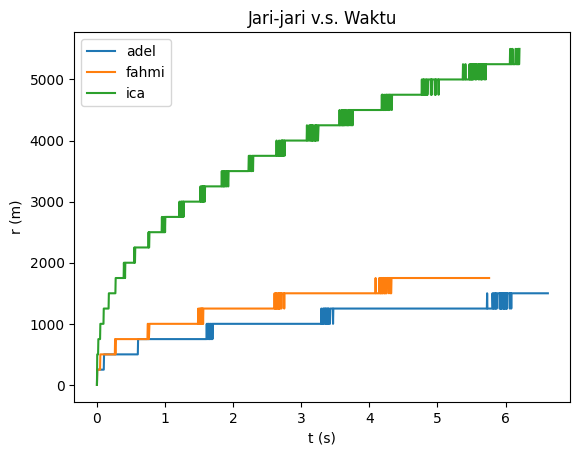

In [9]:
plt.title('Jari-jari v.s. Waktu')

for bomb in ['adel', 'fahmi', 'ica']:
    indivData = filteredData[filteredData['bomb_name'] == bomb]
    
    plt.plot(indivData['t'], indivData['r'])
    plt.xlabel('t (s)')
    plt.ylabel('r (m)')

plt.legend(["adel", "fahmi", "ica"])

Grafik Nilai c Terhadap Waktu Berdasarkan Nama Bom untuk Setiap Percobaan

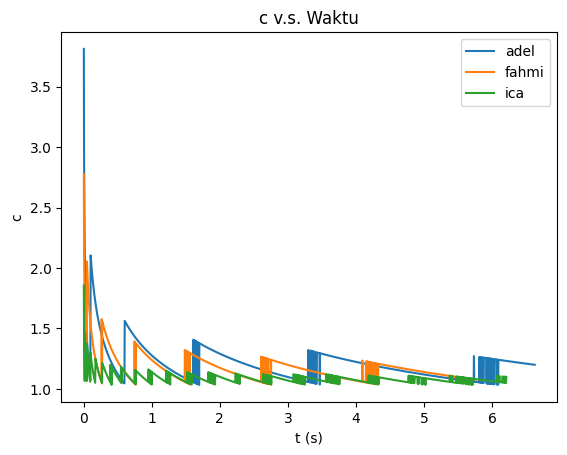

In [10]:
plt.title('c v.s. Waktu')

for bomb in ['adel', 'fahmi', 'ica']:
    indivData = filteredData[filteredData['bomb_name'] == bomb]
    
    plt.plot(indivData['t'], indivData['c'])
    plt.xlabel('t (s)')
    plt.ylabel('c')

plt.legend(["adel", "fahmi", "ica"])

Nilai Rata-rata c untuk Setiap Bom

In [11]:
for bomb in ['adel', 'fahmi', 'ica']:
    indivData = filteredData[filteredData['bomb_name'] == bomb]
    print("Nilai rata-rata c untuk bom " + bomb + " adalah " + str(indivData['c'].mean()))

Nilai rata-rata c untuk bom adel adalah 1.2117342677424765
Nilai rata-rata c untuk bom fahmi adalah 1.1724479802800822
Nilai rata-rata c untuk bom ica adalah 1.0870543207491161


Nilai Rata-rata c Total

In [12]:
filteredData['c'].mean()

np.float64(1.158131951560023)

Nilai rata-rata c adalah **1.158131951560023**, atau dapat dibulatkan menjadi **1.16**

**Part d: Uji Coba Bom Komersial**

Telah diketahui:
- c = 1.16
- E = 1 TJ, 2 TJ, dan 3 TJ
- rho = 1 kg/m^3
- t = 0 s ke 1 s
- r = c (E/rho t^2)^(1/5)

**Grafik Jari-jari Ledakan v.s. Waktu Untuk Setiap Energi Ledakan**

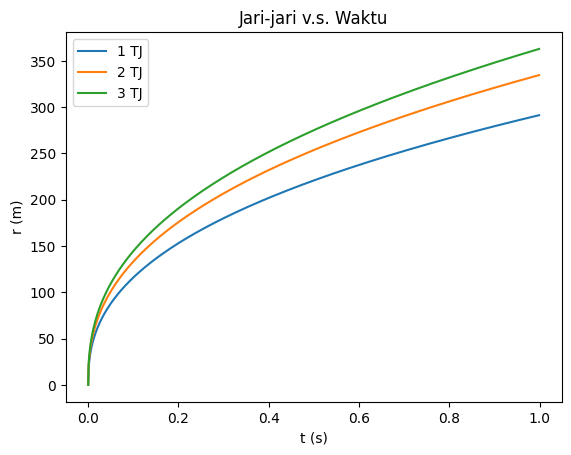

In [13]:
for energy in [1000000000000, 2000000000000, 3000000000000]:
    t = np.arange(0, 1, 0.001)
    r = 1.16 * pow(energy * t * t, 1/5)
    plt.plot(t, r)
    plt.xlabel('t (s)')
    plt.ylabel('r (m)')
    plt.title('Jari-jari v.s. Waktu')

plt.legend(['1 TJ', '2 TJ', '3 TJ'])